In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
DDD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_1')
DiD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_2')

print(DDD_monthly.shape)
print(DiD_monthly.shape)

(60, 33)
(60, 33)


In [3]:
DDD_monthly.head()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,808432.00000,82178.00000,2293639.73300,1581290.86600,127553.93000,5972.50000,9162924.18100,406202.70300,2058451.51500,7040602.99700,6032657.59700,394812.29000,251266.77000,368847.25000,36463.43200,1237.00000,4389,119226.16000,392.33300,7487988.89800,380046.36100,37402.00000,52860,1018480.01900,5763453.83300,132180.08900,3630.00000,84503.99700,1445471.11400,141632.14500,3048642.61400
1,2011,2,616620.00000,45122.24900,1157493.30100,696282.87000,61136.10900,2862.50000,4769411.29200,197234.98700,1104342.02000,3834669.05900,3377467.09400,213818.79100,136951.50500,233383.37500,23492.00100,8530.00000,2709,55221.07400,16.66700,4290421.27800,228961.59000,18734.95000,40400,500394.45100,3398760.75000,90030.33400,80.00000,53749.25300,782166.77600,75703.57300,1526624.53200
2,2011,3,802755.00000,86423.58300,1548117.08800,1330648.93200,90434.89500,7289.50000,5617689.06800,329457.31300,1533168.02300,5369482.61000,5093437.72400,302455.41100,223458.40500,294797.62500,43560.00500,1065.50000,1989,75328.49100,372.00000,5786752.59500,310229.33400,30463.00000,44222,693269.03700,5051867.44900,116273.83500,100.00000,76247.33300,1351392.38900,107942.85800,1763186.51200
3,2011,4,736725.66700,92561.66700,1671628.51000,1363893.90600,115792.60800,6653.00000,8017712.68300,364176.17000,1815438.19100,6185900.90600,5902187.04000,370186.55400,267633.14000,362011.75500,50600.57500,9556.00000,3613,86446.00600,56.66700,6568900.35600,321983.54200,35843.55000,53835,855185.89100,5074208.55000,130223.24300,NaN,88784.16600,1535450.23600,115657.14800,2382097.67100
4,2011,5,1038556.00000,73520.33400,1444498.20400,1482620.94500,110954.71600,8070.00000,5187866.11800,364026.14200,1527030.98000,5131659.71400,5069753.80300,283272.56100,239699.76500,289407.25000,40764.85800,1212.50000,2541,76807.38800,746.00000,5769177.57800,271341.39700,32416.70000,42679,753351.79100,4407539.86700,114328.25300,97.00000,81710.08700,1354098.63500,94492.85500,2152837.94500


In [4]:
DiD_monthly.tail()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
55,2015,8,0.31484,0.00607,0.36936,0.48140,0.02199,0.00029,1.74781,0.01642,0.30342,1.26854,1.12368,0.03956,0.02413,0.15558,0.01293,0.00184,0.00183,0.03410,0.00001,1.35243,0.07191,0.00541,0.01149,0.14173,1.04496,0.03540,0.00000,0.03939,0.28153,0.05683,0.78596
56,2015,9,0.30878,0.00743,0.43295,0.46805,0.02399,0.00030,3.07244,0.02225,0.32754,1.38888,1.23877,0.04396,0.02599,0.18161,0.01448,0.00000,0.00066,0.04201,0.00000,1.43667,0.07778,0.00143,0.01097,0.16557,1.14906,0.04178,0.00000,0.03905,0.31266,0.02422,0.73982
57,2015,10,0.29481,0.00564,0.30297,0.36127,0.01725,0.00031,1.25334,0.01103,0.23875,1.05866,0.98769,0.03240,0.01724,0.12964,0.01425,0.00000,0.00047,0.04487,0.00000,1.19049,0.05613,0.00136,0.00340,0.10194,0.83132,0.02813,0.00000,0.03089,0.22562,0.02286,0.59644
58,2015,11,0.30496,0.00602,0.41777,0.50705,0.01969,0.00022,2.13530,0.01905,0.30164,1.23882,1.17627,0.03405,0.02113,0.14891,0.01268,0.00184,0.00009,0.03655,0.00000,1.46178,0.06854,0.00183,0.00450,0.12511,0.99148,0.03366,0.00000,0.03181,0.27796,0.02556,0.78050
59,2015,12,0.39328,0.00886,0.48467,0.41748,0.02152,0.00045,2.75306,0.02241,0.32176,1.44017,1.35020,0.04666,0.02586,0.16818,0.01594,0.00000,0.00156,0.04252,0.00001,1.70966,0.07067,0.00433,0.00628,0.14487,1.13711,0.03950,0.00000,0.03768,0.29482,0.02094,0.86117


In [5]:
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     int64  
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [6]:
DiD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   60 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   60 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [7]:
DDD_monthly.dtypes

year       int64
month      int64
J01AA    float64
J01BA    float64
J01CA    float64
J01CE    float64
J01CF    float64
J01CG    float64
J01CR    float64
J01DA    float64
J01DB    float64
J01DC    float64
J01DD    float64
J01DE    float64
J01DF    float64
J01DH    float64
J01DI    float64
J01EA    float64
J01EB      int64
J01EC    float64
J01EE    float64
J01FA    float64
J01FF    float64
J01FG    float64
J01GA      int64
J01GB    float64
J01MA    float64
J01XA    float64
J01XB    float64
J01XC    float64
J01XD    float64
J01XE    float64
J01XX    float64
dtype: object

In [8]:
DDD_monthly.columns

Index(['year', 'month', 'J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX'],
      dtype='object')

In [9]:
DiD_monthly.columns

Index(['year', 'month', 'J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX'],
      dtype='object')

In [10]:
DDD_monthly=DDD_monthly.astype({'year':'int64', 'month':'int64', 'J01AA':'float64', 'J01BA':'float64', 'J01CA':'float64',
                    'J01CE':'float64', 'J01CF':'float64', 'J01CG':'float64','J01CR':'float64', 'J01DA':'float64',
                    'J01DB':'float64', 'J01DC':'float64', 'J01DD':'float64', 'J01DE':'float64','J01DF':'float64',
                    'J01DH':'float64','J01DI':'float64', 'J01EA':'float64',
                    'J01EB':'float64', 'J01EC':'float64', 'J01EE':'float64', 'J01FA':'float64', 'J01FF':'float64',
                    'J01FG':'float64', 'J01GA':'float64', 'J01GB':'float64', 'J01MA':'float64', 'J01XA':'float64',
                    'J01XB':'float64', 'J01XC':'float64', 'J01XD':'float64', 'J01XE':'float64', 'J01XX':'float64'})
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [11]:
DiD_monthly=DiD_monthly.astype({'year':'int64', 'month':'int64', 'J01AA':'float64', 'J01BA':'float64', 'J01CA':'float64',
                    'J01CE':'float64', 'J01CF':'float64', 'J01CG':'float64','J01CR':'float64', 'J01DA':'float64',
                    'J01DB':'float64', 'J01DC':'float64', 'J01DD':'float64', 'J01DE':'float64','J01DF':'float64',
                    'J01DH':'float64','J01DI':'float64', 'J01EA':'float64',
                    'J01EB':'float64', 'J01EC':'float64', 'J01EE':'float64', 'J01FA':'float64', 'J01FF':'float64',
                    'J01FG':'float64', 'J01GA':'float64', 'J01GB':'float64', 'J01MA':'float64', 'J01XA':'float64',
                    'J01XB':'float64', 'J01XC':'float64', 'J01XD':'float64', 'J01XE':'float64', 'J01XX':'float64'})
DiD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   60 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   60 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [12]:
DDD_monthly.describe()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
count,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,37.00000,60.00000,60.00000,27.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,34.00000,60.00000,60.00000,60.00000,60.00000
mean,2013.00000,6.50000,1011680.66390,37748.65650,1508265.79248,1545272.98183,93518.47580,1830.47917,7165708.18497,108178.80668,1358527.81198,5442496.47575,4427985.28723,170284.70520,149622.32033,418254.72900,30563.86792,3622.94595,2381.30000,103862.22465,220.88893,5539823.97845,277209.25168,17213.06250,36511.13333,589795.43965,3970255.24763,125864.22303,1759.67647,99836.79820,1141095.23530,112752.31477,2642274.28678
std,1.42615,3.48118,209879.19055,19488.94360,275238.30976,335184.90944,16559.39310,2082.33803,1592029.32101,85569.49164,203829.44328,744161.82387,629705.88022,53462.12785,70760.39898,123224.66184,14069.90348,3965.80474,1516.59174,31569.92280,185.85963,773878.39359,37100.82173,6372.26646,11787.24191,111679.75497,583507.33829,22481.84731,1798.10765,29990.84620,163911.55947,110877.11681,498551.48478
min,2011.00000,1.00000,616620.00000,10993.16700,960667.05300,696282.87000,48937.39300,50.00000,4284636.24200,44864.53400,827250.07300,3793740.86700,2837966.66200,108730.33600,63348.50000,233383.37500,5539.42900,-339.25000,360.00000,55221.07400,-20.00000,3610638.81200,157096.80700,5518.00000,13779.00000,316625.84900,2797643.50000,77297.42100,-78.00000,53749.25300,647230.15700,-464257.13400,1526624.53200
25%,2012.00000,3.75000,861723.45850,25999.41700,1323105.54800,1358293.02950,86436.83925,707.25000,6041669.51500,60432.03125,1242884.13250,5026901.05275,4123737.92550,138397.73025,97780.09375,327065.91500,20503.56275,406.00000,1352.50000,79433.34275,53.33350,5077682.98300,256915.66725,13394.87500,29773.50000,529791.75525,3596878.33750,112317.66600,97.75000,78494.79200,1060899.73350,81415.68075,2288818.77350
50%,2013.00000,6.50000,1025744.91650,31491.45750,1448611.05000,1567270.16500,93480.89300,1100.00000,7057364.96700,68805.37050,1346127.04600,5404080.10450,4349239.04000,156078.12600,110512.38000,380016.50000,26762.28700,1125.00000,1962.00000,98730.65350,212.50000,5507361.15750,278825.97400,16718.25000,36546.00000,591324.36500,3960231.57950,121683.62400,1191.00000,90752.91450,1147921.22400,103403.57700,2673487.50050
75%,2014.00000,9.25000,1172548.75025,45965.85550,1675403.09075,1813291.75250,104994.56250,1738.06250,7743503.96575,129954.84125,1467844.50975,5817460.71275,4865262.60500,178328.01825,227518.74500,499379.62750,38545.14225,7500.00000,3061.50000,120138.12000,347.50000,5842133.62725,289932.77800,18977.93750,44235.75000,642196.99900,4272492.34025,140642.62200,2818.25000,121888.18750,1246715.25100,142013.39175,3026681.27575
max,2015.00000,12.00000,1599060.00000,92561.66700,2311695.44900,2118915.42800,129818.71500,8319.50000,12492330.34000,406202.70300,2058451.51500,8108802.58600,6032657.59700,394812.29000,288961.27500,738401.00000,64793.13700,15197.50000,7440.00000,200115.82000,746.00000,8019353.54000,380046.36100,37402.00000,71290.00000,1018480.01900,5763453.83300,184214.92000,5850.00000,160504.41400,1535450.23600,540946.39600,4037451.39600


In [13]:
DiD_monthly.describe()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
count,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000
mean,2013.00000,6.50000,0.23520,0.00856,0.34987,0.35923,0.02163,0.00041,1.66723,0.02431,0.31366,1.26262,1.02704,0.03912,0.03400,0.09820,0.00717,0.00051,0.00055,0.02426,0.00002,1.28441,0.06415,0.00396,0.00840,0.13609,0.92078,0.02935,0.00023,0.02338,0.26390,0.02665,0.61513
std,1.42615,3.48118,0.05287,0.00393,0.06673,0.08577,0.00363,0.00043,0.40844,0.01758,0.03930,0.18682,0.15517,0.01053,0.01450,0.03323,0.00351,0.00081,0.00036,0.00811,0.00004,0.18853,0.00817,0.00133,0.00257,0.02241,0.14137,0.00627,0.00036,0.00788,0.03500,0.02708,0.13105
min,2011.00000,1.00000,0.13945,0.00270,0.24626,0.15747,0.01254,0.00001,1.07863,0.01093,0.21206,0.86724,0.72750,0.02721,0.01624,0.05156,0.00117,-0.00007,0.00008,0.01249,-0.00000,0.92557,0.04027,0.00136,0.00340,0.08117,0.61615,0.01739,-0.00002,0.01216,0.16591,-0.10443,0.34526
25%,2012.00000,3.75000,0.19628,0.00604,0.30239,0.30079,0.01954,0.00017,1.41193,0.01443,0.29813,1.15084,0.92214,0.03274,0.02300,0.07504,0.00481,0.00000,0.00030,0.01836,0.00000,1.18396,0.05847,0.00313,0.00693,0.12378,0.82802,0.02503,0.00000,0.01726,0.24516,0.01863,0.51750
50%,2013.00000,6.50000,0.23688,0.00737,0.33060,0.34508,0.02200,0.00026,1.65412,0.01604,0.31239,1.25327,1.00572,0.03648,0.02610,0.08828,0.00615,0.00006,0.00045,0.02209,0.00000,1.25188,0.06433,0.00383,0.00852,0.13708,0.89666,0.02807,0.00001,0.02072,0.26601,0.02431,0.60988
75%,2014.00000,9.25000,0.27119,0.00992,0.38789,0.42115,0.02400,0.00041,1.80603,0.02758,0.33097,1.38022,1.12609,0.04199,0.05060,0.12036,0.00923,0.00120,0.00074,0.02912,0.00005,1.39081,0.06854,0.00448,0.01018,0.14723,1.01857,0.03346,0.00045,0.02928,0.28582,0.03373,0.70709
max,2015.00000,12.00000,0.39328,0.01954,0.55308,0.55416,0.02962,0.00176,3.07244,0.08574,0.43450,1.94007,1.41860,0.08334,0.06500,0.18161,0.01594,0.00321,0.00183,0.04823,0.00016,1.91867,0.08086,0.00789,0.01604,0.21498,1.25496,0.04407,0.00123,0.03939,0.33953,0.14255,0.96598


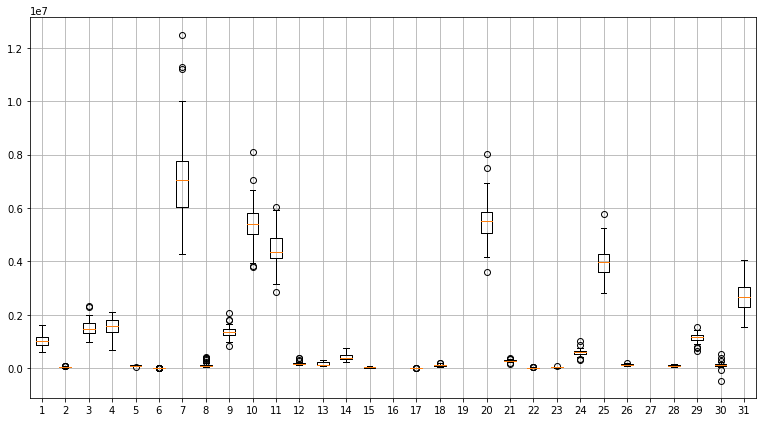

In [14]:
x1=DDD_monthly.loc[:,['J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX']]

plt.figure(figsize=(13,7))
plt.boxplot(x1)
plt.grid()
plt.show()

In [15]:
number_of_DDD_ATC_4=pd.DataFrame()
for fcn in DDD_monthly.columns[2:] :
    df_temp2=DDD_monthly.loc[:,['year','month']]
    df_temp2['fcn_DDD']=fcn
    df_temp2['fcnv_DDD']=DDD_monthly.loc[:,[fcn]]
    number_of_DDD_ATC_4=pd.concat([number_of_DDD_ATC_4,df_temp2],axis=0)
number_of_DDD_ATC_4.head()

,year,month,fcn_DDD,fcnv_DDD
0,2011,1,J01AA,808432.00000
1,2011,2,J01AA,616620.00000
2,2011,3,J01AA,802755.00000
3,2011,4,J01AA,736725.66700
4,2011,5,J01AA,1038556.00000


In [16]:
monthly_DID_in_sample_ATC_4=pd.DataFrame()
for fcn in DiD_monthly.columns[2:] :
    df_temp2=DiD_monthly.loc[:,['year','month']]
    df_temp2['fcn_DID']=fcn
    df_temp2['fcnv_DID']=DiD_monthly.loc[:,[fcn]]
    monthly_DID_in_sample_ATC_4=pd.concat([monthly_DID_in_sample_ATC_4,df_temp2],axis=0)
monthly_DID_in_sample_ATC_4.head()

,year,month,fcn_DID,fcnv_DID
0,2011,1,J01AA,0.17064
1,2011,2,J01AA,0.13945
2,2011,3,J01AA,0.16945
3,2011,4,J01AA,0.15551
4,2011,5,J01AA,0.21922


In [17]:
DDD_DID=pd.concat([number_of_DDD_ATC_4,monthly_DID_in_sample_ATC_4['fcnv_DID']],axis=1,ignore_index=True)
DDD_DID.reset_index(inplace=True,drop=True)
DDD_DID.columns=['year','month','fcn','fcnv_DDD','fcnv_DID']
DDD_DID.head()

,year,month,fcn,fcnv_DDD,fcnv_DID
0,2011,1,J01AA,808432.00000,0.17064
1,2011,2,J01AA,616620.00000,0.13945
2,2011,3,J01AA,802755.00000,0.16945
3,2011,4,J01AA,736725.66700,0.15551
4,2011,5,J01AA,1038556.00000,0.21922


In [18]:
DDD_DID.head()

,year,month,fcn,fcnv_DDD,fcnv_DID
0,2011,1,J01AA,808432.00000,0.17064
1,2011,2,J01AA,616620.00000,0.13945
2,2011,3,J01AA,802755.00000,0.16945
3,2011,4,J01AA,736725.66700,0.15551
4,2011,5,J01AA,1038556.00000,0.21922


In [19]:
DDD_DID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1860 non-null   int64  
 1   month     1860 non-null   int64  
 2   fcn       1860 non-null   object 
 3   fcnv_DDD  1778 non-null   float64
 4   fcnv_DID  1860 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 72.8+ KB


In [20]:
DDD_DID.fcnv_DDD[DDD_DID['fcnv_DDD']<0]

907       -339.25000
931        -45.00000
1090        -3.00000
1093       -20.00000
1570       -78.00000
1573        -1.00000
1577        -1.00000
1752    -66739.24500
1754   -464257.13400
Name: fcnv_DDD, dtype: float64

In [21]:
negative_value_index=DDD_DID[DDD_DID['fcnv_DDD']<0].index
DDD_DID[DDD_DID['fcnv_DDD']<0]

,year,month,fcn,fcnv_DDD,fcnv_DID
907,2011,8,J01EA,-339.25000,-0.00007
931,2013,8,J01EA,-45.00000,-0.00001
1090,2011,11,J01EE,-3.00000,-0.00000
1093,2012,2,J01EE,-20.00000,-0.00000
1570,2011,11,J01XB,-78.00000,-0.00002
1573,2012,2,J01XB,-1.00000,-0.00000
1577,2012,6,J01XB,-1.00000,-0.00000
1752,2012,1,J01XE,-66739.24500,-0.01501
1754,2012,3,J01XE,-464257.13400,-0.10443


In [22]:
DDD_DID.iloc[negative_value_index,[3]]=0
DDD_DID.iloc[negative_value_index,[4]]=0

In [23]:
DDD_DID[DDD_DID['fcnv_DDD']<0]

,year,month,fcn,fcnv_DDD,fcnv_DID


In [24]:
print(DDD_DID.isnull().sum())

year         0
month        0
fcn          0
fcnv_DDD    82
fcnv_DID     0
dtype: int64


In [25]:
DDD_DID[DDD_DID['fcnv_DDD'].isna()].groupby('fcn').count()

,year,month,fcnv_DDD,fcnv_DID
fcn,,,,
J01EA,23,23,0,23
J01EE,33,33,0,33
J01XB,26,26,0,26


تا این مرحله داده های اصلی که برای شبکه عصبی لازم میباشد را توانستیم بسازیم و مقادیر منفی یا به اصطلاح نویزی ان راصفر کردیم و مقادیر گم شده را هم پیدا کردیم و حذف خواهیم کرد در مرحله بعدی نیز باید تمام داده های شبکه عصبی را نیز استاندارد کنیم

In [26]:
columns_name=['year', 'month', 'fcn', 'fcnv_DDD', 'fcnv_DID']

In [27]:
from sklearn import preprocessing

از کتابخانه فرخوانی شده برای نرمال کرد داده ها استفاده میکنیم

In [28]:
DDD_DiD_byhistory=DDD_DID.copy()
print(DDD_DiD_byhistory.shape)
DDD_DiD_byhistory=DDD_DiD_byhistory.dropna().copy()
print('removed dataset shape:',DDD_DiD_byhistory.shape)

(1860, 5)
removed dataset shape: (1778, 5)


تمامی سطر هایی که در ان مقادیر گم شده یافت شده است را حذف میکنیم پس تعداد سطر ها کاهش پیدا خواهد کرد.

In [29]:
fcn_DDD=DDD_DiD_byhistory.fcnv_DDD.copy()

sd_scaler = preprocessing.StandardScaler()
sd_scaler.fit(fcn_DDD.values.reshape(-1,1))
X_train_minmax =sd_scaler.transform(fcn_DDD.values.reshape(-1,1))

داده هارا استاندارد میکنیم

In [30]:
fcn_DDD_temp=pd.DataFrame(
                          X_train_minmax.reshape(-1,1),
                          index=DDD_DiD_byhistory.fcnv_DDD.index,
                          columns=['fcnv_DDD']
)
print('fcn_DDD_temp.shape:',fcn_DDD_temp.shape)
#replace by new data
DDD_DiD_byhistory.loc[:,['fcnv_DDD']]=fcn_DDD_temp.iloc[:,[0]].copy()
print('DDD_DiD_byhistory[''fcnv_DDD''].shape==>',DDD_DiD_byhistory['fcnv_DDD'].shape)

fcn_DDD_temp.shape: (1778, 1)
DDD_DiD_byhistory[fcnv_DDD].shape==> (1778,)


In [31]:
DDD_DiD_byhistory.head()

,year,month,fcn,fcnv_DDD,fcnv_DID
0,2011,1,J01AA,-0.23844,0.17064
1,2011,2,J01AA,-0.33399,0.13945
2,2011,3,J01AA,-0.24127,0.16945
3,2011,4,J01AA,-0.27416,0.15551
4,2011,5,J01AA,-0.12381,0.21922


مقادیر دوز مصرفی بین بازه -۱ تا ۱ قرار خواهد گرفت

In [32]:
#-------------------------------------------------------------------------------------
#Create Historical data-------------------------------------------------------------------------
print('DDD_DiD_byhistory.shape\n befor add history:',DDD_DiD_byhistory.shape)
prd=0
for prd in range(1,13):
    DDD_DiD_byhistory= pd.concat(
        [
            DDD_DiD_byhistory,
            DDD_DiD_byhistory['fcnv_DDD'].shift(periods=prd,fill_value=0)
        ],axis=1
         )
    print(DDD_DiD_byhistory.shape)
    columns_name.append('fcnv_DDD_shift'+str(prd))
    DDD_DiD_byhistory.columns=columns_name
#End of for------------------------------------------------------------------------------------    
print(DDD_DiD_byhistory.columns)

DDD_DiD_byhistory.shape
 befor add history: (1778, 5)
(1778, 6)
(1778, 7)
(1778, 8)
(1778, 9)
(1778, 10)
(1778, 11)
(1778, 12)
(1778, 13)
(1778, 14)
(1778, 15)
(1778, 16)
(1778, 17)
Index(['year', 'month', 'fcn', 'fcnv_DDD', 'fcnv_DID', 'fcnv_DDD_shift1',
       'fcnv_DDD_shift2', 'fcnv_DDD_shift3', 'fcnv_DDD_shift4',
       'fcnv_DDD_shift5', 'fcnv_DDD_shift6', 'fcnv_DDD_shift7',
       'fcnv_DDD_shift8', 'fcnv_DDD_shift9', 'fcnv_DDD_shift10',
       'fcnv_DDD_shift11', 'fcnv_DDD_shift12'],
      dtype='object')


برای پیش بینی تاریخچه یک سال گذشته را با استفاده از حلقه فور و شیفت ایجاد میکنیم

In [33]:
col_name=DDD_DiD_byhistory.columns.values.tolist()

In [34]:
col_name.remove('fcnv_DDD')
col_name.remove('fcnv_DID')

col_name

['year',
 'month',
 'fcn',
 'fcnv_DDD_shift1',
 'fcnv_DDD_shift2',
 'fcnv_DDD_shift3',
 'fcnv_DDD_shift4',
 'fcnv_DDD_shift5',
 'fcnv_DDD_shift6',
 'fcnv_DDD_shift7',
 'fcnv_DDD_shift8',
 'fcnv_DDD_shift9',
 'fcnv_DDD_shift10',
 'fcnv_DDD_shift11',
 'fcnv_DDD_shift12']

In [35]:
from sklearn.neural_network  import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
df_X=DDD_DiD_byhistory.loc[:,col_name]
df_Y=DDD_DiD_byhistory.loc[:,['fcnv_DDD']]
#df_Y=pd.DataFrame(fcn_DDD)
Y=df_Y.values.ravel()
Y

array([-0.23844016, -0.3339884 , -0.24126808, ...,  0.56687431,
        0.93965425,  1.10304697])

داده های اموزش و تست در شبکه عصبی را ایجاد میکنیم

In [37]:
df_X.head()

,year,month,fcn,fcnv_DDD_shift1,fcnv_DDD_shift2,fcnv_DDD_shift3,fcnv_DDD_shift4,fcnv_DDD_shift5,fcnv_DDD_shift6,fcnv_DDD_shift7,fcnv_DDD_shift8,fcnv_DDD_shift9,fcnv_DDD_shift10,fcnv_DDD_shift11,fcnv_DDD_shift12
0,2011,1,J01AA,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2011,2,J01AA,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2011,3,J01AA,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,2011,4,J01AA,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2011,5,J01AA,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [38]:
print(df_X.shape)

(1778, 15)


In [39]:
df_X['fcn'].values.reshape(-1,1)

array([['J01AA'],
       ['J01AA'],
       ['J01AA'],
       ...,
       ['J01XX'],
       ['J01XX'],
       ['J01XX']], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()
integer_fcn=lbl_encoder.fit_transform(df_X['fcn'].values.reshape(-1,1))
df_X['fcn']=integer_fcn
df_X

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,year,month,fcn,fcnv_DDD_shift1,fcnv_DDD_shift2,fcnv_DDD_shift3,fcnv_DDD_shift4,fcnv_DDD_shift5,fcnv_DDD_shift6,fcnv_DDD_shift7,fcnv_DDD_shift8,fcnv_DDD_shift9,fcnv_DDD_shift10,fcnv_DDD_shift11,fcnv_DDD_shift12
0,2011,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2011,2,0,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2011,3,0,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,2011,4,0,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2011,5,0,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,2011,6,0,-0.12381,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,2011,7,0,-0.28058,-0.12381,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,2011,8,0,-0.05972,-0.28058,-0.12381,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000,0.00000
8,2011,9,0,-0.06056,-0.05972,-0.28058,-0.12381,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000,0.00000
9,2011,10,0,0.02327,-0.06056,-0.05972,-0.28058,-0.12381,-0.27416,-0.24127,-0.33399,-0.23844,0.00000,0.00000,0.00000


اسم تمامی گروه هارا کد گذاری میکنیم تا کار کردن با ان ها راحت تر شود

In [41]:
result=[]
result.append(['historysize','RMSE','MSE','MAE','hlayer_1_size','hlayer_2_size','shuffle','randome_state'])

In [ ]:
shfl=False
rnd_std=444
X_train,X_test,Y_train,Y_test=train_test_split(df_X,Y,test_size=0.05,shuffle=shfl,random_state=rnd_std)

hlayer_1_size=100
hlayer_2_size=50
model_DDD=MLPRegressor((hlayer_1_size,hlayer_2_size),
                       max_iter=1000,
                       verbose=False,
                       activation="relu"
                      )
model_DDD.fit(X_train,Y_train)
y_pred=model_DDD.predict(X_test)
print(model_DDD.get_params)
print(Y_test[-5:-1].round(2))
print(y_pred[-5:-1].round(2))
print(y_pred[-5:-1].round(2)  -  Y_test[-5:-1].round(2) )

RMSE=round(mean_squared_error(Y_test,y_pred,squared=False) ,2)
MSE=round(mean_squared_error(Y_test,y_pred),2)
MAE=round(mean_absolute_error(Y_test,y_pred),2)
print('rmse:'.upper(),RMSE)
print('mse:'.upper(),MSE)
print('mae:'.upper(),MAE)


result.append([prd,RMSE,MSE,MAE,hlayer_1_size,hlayer_2_size,shfl,rnd_std])
pd.DataFrame(result)

شبکه عصبی با دو لایه پنهان و بدون شافل کردن و با داده های نرمال شده میسازیم 

 به دلیل اینکه بازه اعداد کوچکتر شده اند عدد کوچک تری شده است اما باز هم به نسبت بدون نرمال کردن عدد بزرگی میباشدRMSE 

In [42]:
import matplotlib.pyplot as plt

[[172292.74619847]
 [163723.10041634]
 [ 98470.22378359]
 [167388.31953839]]


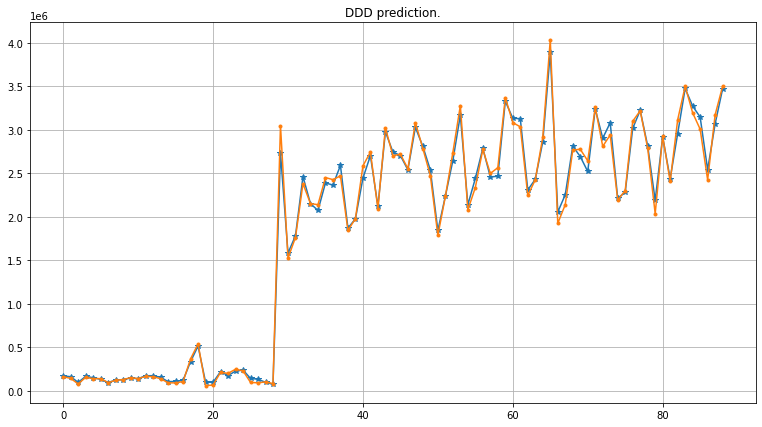

RMSE: 72320.61
MSE: 5230271121.0
MAE: 50712.06


In [43]:
y_pred2=sd_scaler.inverse_transform(y_pred.reshape(-1,1))
Y_test2=sd_scaler.inverse_transform(Y_test.reshape(-1,1))
print(y_pred2[0:4])



plt.figure(figsize=(13,7))
plt.title('DDD prediction.')
plt.plot(y_pred2,ls='-',marker='*')
plt.plot(Y_test2,ls='-',marker='.')

plt.grid()
plt.show()



RMSE=round(mean_squared_error(Y_test2,y_pred2,squared=False) ,2)
MSE=round(mean_squared_error(Y_test2,y_pred2),2)
MAE=round(mean_absolute_error(Y_test2,y_pred2),2)
print('rmse:'.upper(),RMSE)
print('mse:'.upper(),MSE)
print('mae:'.upper(),MAE)

در نمودار رسم شده مقادیر پیش بینی شده با علامت ستاره و مقادیر تست ما با علامت نقطه مشخص شده است و با استفاده از نمودار میتوان کارایی شبکه عصبی و تفاوت را مشاهده کرد.

In [49]:
print(y_pred2[0:7].ravel().round(2))
print(Y_test2[0:7].ravel().round(2))

print(Y_test2[0:7].ravel().round(2) -  y_pred2[0:7].ravel().round(2)  )

[ 67220.35  83898.73  62059.35  40730.46  34535.18 147897.59 141500.17]
[163967.86 144471.43  80646.43 155839.3  141514.28 141925.    95550.  ]
[ 96747.51  60572.7   18587.08 115108.84 106979.1   -5972.59 -45950.17]
